<a href="https://colab.research.google.com/github/Jacobgokul/ML-Playground/blob/main/PCA_%26_t_SNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PCA**

In [1]:
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()
X = iris.data  # Features (sepal length, sepal width, petal length, petal width)
y = iris.target  # Labels (species) | setosa, versicolor, virginica


In [4]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  # Create a StandardScaler instance
X_scaled = scaler.fit_transform(X)  # Standardize the features


In [9]:
X_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # Reduce to 2 principal components
X_pca = pca.fit_transform(X_scaled)  # Apply PCA transformation


In [8]:
X_pca

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

In [10]:
import pandas as pd

df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])  # Name new dimensions
df_pca["species"] = y  # Add species label


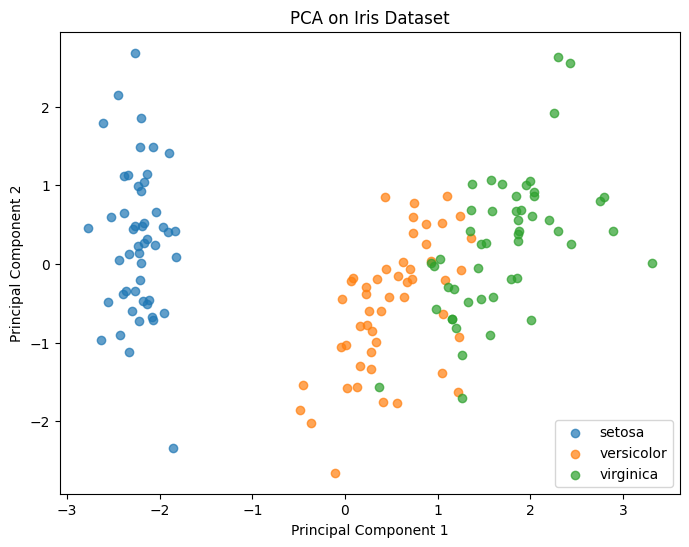

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
for species, color in zip([0, 1, 2], ["red", "green", "blue"]):
    plt.scatter(df_pca[df_pca["species"] == species]["PC1"],
                df_pca[df_pca["species"] == species]["PC2"],
                label=iris.target_names[species], alpha=0.7)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA on Iris Dataset")
plt.legend()
plt.show()


In [12]:
print("Explained Variance:", pca.explained_variance_ratio_)


Explained Variance: [0.72962445 0.22850762]


#**t-SNE**

 primarily used for visualizing high-dimensional data in 2D or 3D while preserving local structures.

In [13]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler

# Load handwritten digits dataset (8x8 images of digits 0-9)
digits = load_digits()
X = digits.data  # Features (64 pixel values)
y = digits.target  # Labels (0-9 digits)

# Standardize data for better performance
X_scaled = StandardScaler().fit_transform(X)


In [15]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [22]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=70, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)


In [23]:
import pandas as pd

df_tsne = pd.DataFrame(X_tsne, columns=["TSNE1", "TSNE2"])
df_tsne["digit"] = y  # Add digit labels


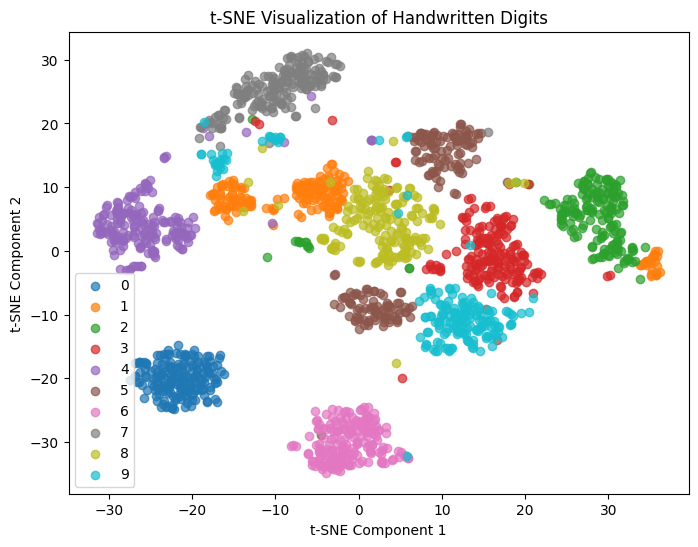

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
for digit in range(10):
    subset = df_tsne[df_tsne["digit"] == digit]
    plt.scatter(subset["TSNE1"], subset["TSNE2"], label=str(digit), alpha=0.7)

plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Visualization of Handwritten Digits")
plt.legend()
plt.show()
